In [36]:
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

creo un esempio di classificatori random

In [2]:
X, y = make_classification(n_samples=2500, n_features=6, n_informative= 2, random_state=42)

In [3]:
X

array([[-1.2084088 ,  0.62531833, -0.22807118, -0.16927444,  1.09896257,
        -0.06150299],
       [ 1.59164289, -1.5138305 ,  0.90514963,  0.6308756 , -0.89726827,
         0.72374266],
       [-1.18093536, -2.35448292, -0.08529258,  0.01825246,  1.19916413,
         0.08613142],
       ...,
       [ 0.05075254,  1.02284147, -1.13508108, -0.19044619, -1.08760317,
        -1.21397738],
       [-0.13169111,  0.93306661,  1.45374005,  0.0635419 ,  1.46503562,
         1.56476875],
       [ 2.35434471, -0.71551299,  0.71004935,  1.12149921, -1.8993702 ,
         0.40221379]], shape=(2500, 6))

In [4]:
y

array([0, 1, 0, ..., 0, 1, 1], shape=(2500,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, Y_train: {y_train.shape}, Y_test: {y_test.shape}')


X_train: (2000, 6), X_test: (500, 6), Y_train: (2000,), Y_test: (500,)


In [6]:
y

array([0, 1, 0, ..., 0, 1, 1], shape=(2500,))

provo lo stocastic gradient descend

In [14]:
sgd = SGDClassifier(loss='log_loss', verbose=False, shuffle=True)

sgd.fit(X_train, y_train)
y_pred_proba = sgd.predict_proba(X_test)
print(f"LOSS: {log_loss(y_test, y_pred_proba)}")

LOSS: 0.3297762930291794


ora creiamo una funzione per il minibatch gradient descend

In [24]:
def minibatch_gradient_descend(train_set, test_set, n_batches=10, epochs=10, loss='log_loss', verbose=False):
  X_train, y_train = train_set
  X_test, y_test = test_set
  
  batch_size = X_train.shape[0]/n_batches
  log_losses = []
  sgd = SGDClassifier(loss=loss, verbose=verbose)
  
  for epoch in range(epochs):
    X_shuffled, y_shuffled = shuffle(X_train, y_train)
    for batch in range(n_batches):
      batch_start = int(batch*batch_size)
      batch_end = int((batch+1)*batch_size)
      
      X_batch = X_shuffled[batch_start:batch_end, :]
      y_batch = y_shuffled[batch_start:batch_end]
      
      classes = np.unique(y_train)
      
      sgd.partial_fit(X_batch, y_batch, classes = classes)
      loss_value = log_loss(y_test, sgd.predict_proba(X_test), labels=classes)
      log_losses.append(loss_value)
      
    print(f'loss epoca {epoch}: {loss_value}')
  return (sgd, log_losses)

simuliamo il full batch

In [40]:
full_gd, full_gd_loss = minibatch_gradient_descend((X_train, y_train), (X_test, y_test), n_batches=1, epochs=200)

loss epoca 0: 2.0101301982243758
loss epoca 1: 1.26854704201284
loss epoca 2: 0.7877701472199501
loss epoca 3: 0.5586373664942517
loss epoca 4: 0.651040163268168
loss epoca 5: 0.8676352139071255
loss epoca 6: 0.45930019304076536
loss epoca 7: 0.5124126682776657
loss epoca 8: 0.4604960566587943
loss epoca 9: 0.4344392771324322
loss epoca 10: 0.4311762983952842
loss epoca 11: 0.3945509033316042
loss epoca 12: 0.4163268474968929
loss epoca 13: 0.37264912301165715
loss epoca 14: 0.3370388711661947
loss epoca 15: 0.3269719486185258
loss epoca 16: 0.3967588578772701
loss epoca 17: 0.3302905089414964
loss epoca 18: 0.3313206474968918
loss epoca 19: 0.3261328851279213
loss epoca 20: 0.3771652927691351
loss epoca 21: 0.38945331018448825
loss epoca 22: 0.3343045256802875
loss epoca 23: 0.3469505661506628
loss epoca 24: 0.32887322060816426
loss epoca 25: 0.3317162001595538
loss epoca 26: 0.3586048756206485
loss epoca 27: 0.34465543365374884
loss epoca 28: 0.3398752950946754
loss epoca 29: 0.33559

In [30]:
stochastic_gd, stochastic_gd_loss = minibatch_gradient_descend((X_train, y_train), (X_test, y_test), n_batches=X_train.shape[0], epochs=100)

loss epoca 0: 1.7830934402135832
loss epoca 1: 1.0428741256829446
loss epoca 2: 0.9120897664023881
loss epoca 3: 0.7086782685926504
loss epoca 4: 0.7113695801255723
loss epoca 5: 0.42842203298769016
loss epoca 6: 0.5326389333414691
loss epoca 7: 0.3961612413586173
loss epoca 8: 0.32331958094007884
loss epoca 9: 0.3965623235136129
loss epoca 10: 0.5867627473086571
loss epoca 11: 0.41831712902191326
loss epoca 12: 0.3820898729557151
loss epoca 13: 0.4155518586300137
loss epoca 14: 0.3652093327915434
loss epoca 15: 0.341802888343767
loss epoca 16: 0.3747377835646255
loss epoca 17: 0.3909643099923137
loss epoca 18: 0.387649748385183
loss epoca 19: 0.3401751872036715
loss epoca 20: 0.328350750974322
loss epoca 21: 0.3518006112801195
loss epoca 22: 0.3629796186857717
loss epoca 23: 0.3584124892229071
loss epoca 24: 0.36570670631219077
loss epoca 25: 0.37143356643505593
loss epoca 26: 0.3393571344616071
loss epoca 27: 0.3081469791056158
loss epoca 28: 0.3251638689012334
loss epoca 29: 0.31919

In [32]:
mini_batch_gd, mini_batch_gd_loss = minibatch_gradient_descend((X_train, y_train), (X_test, y_test), n_batches=20, epochs=100)

loss epoca 0: 1.7506826342473982
loss epoca 1: 0.9776716379058333
loss epoca 2: 1.1149519320721777
loss epoca 3: 1.545612433435408
loss epoca 4: 0.5643287036219059
loss epoca 5: 0.415074738835478
loss epoca 6: 0.4655428628296133
loss epoca 7: 0.4601725214777553
loss epoca 8: 0.43334321425229094
loss epoca 9: 0.34712938442736846
loss epoca 10: 0.38082209034682873
loss epoca 11: 0.4209619506183046
loss epoca 12: 0.38627020331819617
loss epoca 13: 0.35721614942182456
loss epoca 14: 0.36963459913661645
loss epoca 15: 0.31108201491211995
loss epoca 16: 0.3434287585906193
loss epoca 17: 0.35107610650366555
loss epoca 18: 0.33308515741321437
loss epoca 19: 0.38325797285334934
loss epoca 20: 0.3759033695500094
loss epoca 21: 0.3508520639299423
loss epoca 22: 0.35998820968904627
loss epoca 23: 0.36263531906902646
loss epoca 24: 0.3432813762982839
loss epoca 25: 0.35173156864698907
loss epoca 26: 0.35217610735206023
loss epoca 27: 0.33122288007174
loss epoca 28: 0.340574562016962
loss epoca 29: 

(0.0, 200.0)

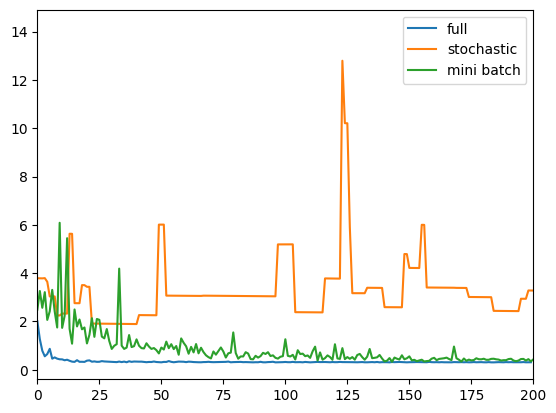

In [41]:
plt.plot(full_gd_loss, label="full")
plt.plot(stochastic_gd_loss, label="stochastic")
plt.plot(mini_batch_gd_loss, label="mini batch")
plt.legend()
plt.xlim(xmin=0, xmax=200)

lo stochastic gradient descend è più lento rispetto a minibatch e full, per questo è consigliabile scegliere tra queste 2, ma per ragiioni di memoria il minibatch è preferibile